In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('base de dados.csv')
dados.shape

(7043, 18)

In [4]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [5]:
traducao_dic = {
    'Sim' : 1,
    'Nao' : 0
}

dadosmodificados = dados[['Conjuge', 'Dependentes', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

,Conjuge,Dependentes,PagamentoOnline,Churn
0,1,0,1,0
1,0,0,0,0
2,0,0,1,1
3,0,0,0,0
4,0,0,1,1


In [7]:
#transformação pelo get_dummies
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'PagamentoOnline', 'Churn'], 
                                         axis=1))

#junção dos dados transformados pelo dummie e pelo tradutor
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)
dados_final.head()

,Conjuge,Dependentes,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,TelefoneFixo_Nao,TelefoneFixo_Sim,VariasLinhasTelefonicas_Nao,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,1,0,0,1,29.85,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,34,56.95,0,1,1,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,0,2,53.85,0,1,1,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,45,42.30,1,0,0,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,0,2,70.70,0,1,1,...,1,0,0,0,1,0,0,1,0,0


In [8]:
pd.set_option('display.max_columns', 39)
dados_final.head()

,Conjuge,Dependentes,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,TelefoneFixo_Nao,TelefoneFixo_Sim,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,...,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,1,0,0,1,29.85,1,0,0,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,34,56.95,0,1,1,0,0,1,0,0,0,0,1,1,...,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,0,2,53.85,0,1,1,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,45,42.30,1,0,0,1,0,1,0,0,0,0,1,1,...,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,0,2,70.70,0,1,1,0,0,0,1,0,1,0,0,1,...,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [9]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1]]


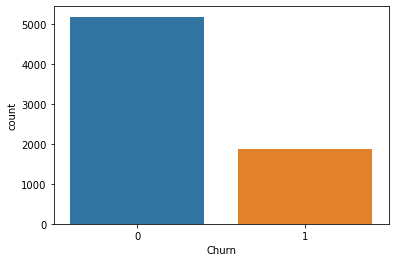

In [10]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

In [ ]:
!pip install -U imbalanced-learn

In [ ]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [ ]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados